In [1]:
import camelot as cm

In [2]:
!ls

extractor-code.ipynb
vietnam-human-development-indicators.pdf


In [ ]:
flavor: "stream", "lattice"

In [44]:
input_pdf = cm.read_pdf('vietnam-human-development-indicators.pdf', flavor="lattice", pages='6,18,19,21,29')


In [45]:
input_pdf

<TableList n=5>

In [47]:
for i in input_pdf:
    print(i)

<Table shape=(17, 7)>
<Table shape=(9, 6)>
<Table shape=(18, 8)>
<Table shape=(18, 10)>
<Table shape=(10, 5)>


In [51]:
df = input_pdf[0].df
df

,0,1,2,3,4,5,6
0,Country,HDI \ncountry \nranking,HDI,Life \nexpectancy at \nbirth (years),Mean years \nof schooling,Expected \nyears of \nschooling,GNI per capita (2011 \nPPP $)
1,,,2017,2017,2017,2017,2017
2,China,86,.0.752,76.4,7.8,13.8,"15,270"
3,India,130,0.640,68.8,6.4,12.3,"6,353"
4,Indonesia,116,0.694,69.4,8.0,12.8,"10,846"
5,Lao People’s \nDemocratic \nRepublic,139,0.601,67.0,5.2,11.2,"6,070"
6,Malaysia,57,0.802,75.5,10.2,13.7,"26,107"
7,Philippines,113,0.699,69.2,9.3,12.6,"9,154"
8,Republic of Korea,22,0.903,82.4,12.1,16.5,"35,945"
9,Thailand,83,0.755,75.5,7.6,14.7,"15,516"


In [52]:
df = df.loc[6:10, 0:6]
df

,0,1,2,3,4,5,6
6,Malaysia,57,0.802,75.5,10.2,13.7,"26,107"
7,Philippines,113,0.699,69.2,9.3,12.6,"9,154"
8,Republic of Korea,22,0.903,82.4,12.1,16.5,"35,945"
9,Thailand,83,0.755,75.5,7.6,14.7,"15,516"
10,Viet Nam,116,0.694,76.5,8.2,12.7,"5,859"


In [53]:
df = df.reset_index(drop=True)
df

,0,1,2,3,4,5,6
0,Malaysia,57,0.802,75.5,10.2,13.7,"26,107"
1,Philippines,113,0.699,69.2,9.3,12.6,"9,154"
2,Republic of Korea,22,0.903,82.4,12.1,16.5,"35,945"
3,Thailand,83,0.755,75.5,7.6,14.7,"15,516"
4,Viet Nam,116,0.694,76.5,8.2,12.7,"5,859"


In [54]:
df.columns = ["Country", "HDI country ranking", "HDI", "Life expectancy at birth (years)", "Mean years of schooling", "Expected years of schooling", "GNI per capita"]

In [55]:
df

,Country,HDI country ranking,HDI,Life expectancy at birth (years),Mean years of schooling,Expected years of schooling,GNI per capita
0,Malaysia,57,0.802,75.5,10.2,13.7,"26,107"
1,Philippines,113,0.699,69.2,9.3,12.6,"9,154"
2,Republic of Korea,22,0.903,82.4,12.1,16.5,"35,945"
3,Thailand,83,0.755,75.5,7.6,14.7,"15,516"
4,Viet Nam,116,0.694,76.5,8.2,12.7,"5,859"


In [62]:
df['GNI per capita'] = df['GNI per capita'].apply(lambda x: x.replace(',', '.'))
df

,Country,HDI country ranking,HDI,Life expectancy at birth (years),Mean years of schooling,Expected years of schooling,GNI per capita
0,Malaysia,57,0.802,75.5,10.2,13.7,26.107
1,Philippines,113,0.699,69.2,9.3,12.6,9.154
2,Republic of Korea,22,0.903,82.4,12.1,16.5,35.945
3,Thailand,83,0.755,75.5,7.6,14.7,15.516
4,Viet Nam,116,0.694,76.5,8.2,12.7,5.859


In [64]:
df.loc[:, 'HDI country ranking':'GNI per capita'] = df.loc[:, 'HDI country ranking':'GNI per capita'].astype(float)
df

,Country,HDI country ranking,HDI,Life expectancy at birth (years),Mean years of schooling,Expected years of schooling,GNI per capita
0,Malaysia,57.0,0.802,75.5,10.2,13.7,26.107
1,Philippines,113.0,0.699,69.2,9.3,12.6,9.154
2,Republic of Korea,22.0,0.903,82.4,12.1,16.5,35.945
3,Thailand,83.0,0.755,75.5,7.6,14.7,15.516
4,Viet Nam,116.0,0.694,76.5,8.2,12.7,5.859


In [67]:
df.to_csv('csv_output.csv', index=False)

In [68]:
df.to_excel('xlsx_output.xlsx', index=False)

In [69]:
import pandas as pd

In [70]:
df2 = pd.read_csv('csv_output.csv')
df2

,Country,HDI country ranking,HDI,Life expectancy at birth (years),Mean years of schooling,Expected years of schooling,GNI per capita
0,Malaysia,57.0,0.802,75.5,10.2,13.7,26.107
1,Philippines,113.0,0.699,69.2,9.3,12.6,9.154
2,Republic of Korea,22.0,0.903,82.4,12.1,16.5,35.945
3,Thailand,83.0,0.755,75.5,7.6,14.7,15.516
4,Viet Nam,116.0,0.694,76.5,8.2,12.7,5.859


In [80]:
import seaborn as sns

<AxesSubplot:xlabel='Country', ylabel='Mean years of schooling'>

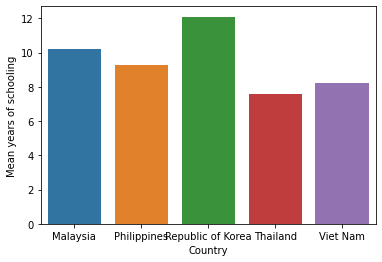

In [81]:
sns.barplot(x='Country', y='Mean years of schooling', data=df2)

In [ ]:
# From here, we can see that Korea had the largest number of mean years of schooling